# Semi-Supervised Anomaly Detection Survey
https://www.kaggle.com/matheusfacure/semi-supervised-anomaly-detection-survey

몇 가지 이상 탐지 기술의 작동 방식, 장점 및 단점이 무엇인지에 대해 살펴보겠습니다.

이상 탐지 문제가 무엇이고 어떤 타입들이 있는지, 어떤 문제에 당면해있는지 등을 살펴보고 여기에 사용된 데이터셋의 특성에 대해 설명할 것입니다.

여기서의 데이터셋은 이상 행위 탐지라는 한 종류의 탐지 업무에만 한정되지만, 우리는 여기에 국한되지 않고 더 일반적인 것처럼 다룰 예정입니다.

우리의 의도는 부정 행위 탐지에 맞춤화되지 않더라도 주요한 이상 탐지 기술 중 일부를 어떻게 구현할 수 있는지에 대해 실질적인 조사를 제공하는 것입니다. 그럼에도 불구하고 우리는 언제 어떤 방법을 선호해야 하는지에 대해 토론할 것이고, 그 과정에서 어떤 방법이 어떤 경우에 다른 방법보다 더 좋은 결과를 낳는지 정당화할 것입니다.

## What is an anomaly
> "이상 징후는 정상 동작에 대해 정의된 개념에 부합하지 않는 데이터 패턴입니다."-(Chandola et al, 2009)

즉, 대부분의 관측치로부터 온 데이터가 아닌 다른 생성 프로세스에서 가져온 데이터라고 생각할 수 있습니다. 예를 들어, 설문 조사에서 얻은 아래 이미지에서 (O_1) 및 (O_2) (O는 이상치입니다.)는 다른 점들과 분리된 것을 볼 수 있습니다. 이것은 두 점이 두 차원에서의 이상 징후라는 매우 강력한 신호입니다.
![outlier](A-simple-example-of-anomalies-in-a-2-dimensional-data-set.png)

또한 (O_3)영역의 점들도 이상 징후입니다. 데이터끼리 인접영역에 속해있어도 정규 데이터가 있는 (N_1) 및 (N_2)로 표시된 분포가 아닌 다른 분포에서 발생하기 때문입니다.

이상 징후는 여러 가지 이유로 발생할 수 있습니다. 일부 예로는 신용카드 사기, 기계 또는 센서의 오작동, 정부 부패, 경제 위기 또는 질병으로 부터 증상 발현 등이 있습니다.

이상 징후에는 세 가지 유형이 있습니다. 첫 번째는 점 이상, 즉 "개별 데이터 인스턴스는 나머지 데이터에 대해 비정상적으로 간주될 수 있습니다"(idem) 위의 이미지에서 인스턴스(o_1)과 (o_2) 및 (O_3)의 모든 인스턴스는 정규 영역 외부에 있으므로 점 이상 징후입니다. 또 다른 예로 사용된 금액에 대한 정보만을 포함한 신용카드 거래 데이터를 생각해본다면 특정 개인에 대한 나머지 거래액과 비교하여 높은 거래액은 이상적입니다.

두 번째 유형의 이상 징후는 상황에 따라 다릅니다. 이 경우 데이터에는 일부 상황별 특성(예: 시간, 공간)과 관련된 기능과 동작 속성과 관련된 일부 기능이 있어야 합니다.
이 문제는 지정된 문맥에서 결정된 것이 아닙니다. 신용카드 거래로 다시 예를 들면, 모든 연월일에 대한 지출 금액을 알고 있을 때 크리스마스 전 주에 고액 거래가 일어났다면 정상으로 여겨질 수 있습니다. 그러나 7월에 같은 액수의 거래가 일어난다면 의심스러울 수 있습니다. 거래할 때 휴가 때 처럼 집에서 멀리 떨어진 곳에서 높은 금액의 거래가 이루어질 수 있다고 위치 정보를 통해 예상할 수도 있습니다.

마지막 이상 징후 유형은 집합적입니다. 이 경우 일부 관련된 데이터 인스턴스는 전체 데이터 세트에 대해 이상적이지만, 각 개별 인스턴스는 이상치로 간주되지 않을 수 있습니다. 예를 들어, 소매업체가 판매하는 물품의 재고를 고려해보겠습니다. 재고는 시간에 따라 변동하고, 재고가 많았다면 재고가 적을 때도 있습니다. 그러나 장기간 재고가 없는 것은 이례적입니다. 재고의 수량이 아닌 지속성이라는 점에 유의하십시오.

2,3 유형은 데이터 인스턴스 간의 일부 관계를 가정합니다. 즉 데이터 인스턴스 간에 독립적으로 분산되지 않습니다. 현재는 신용카드 거래 정보가 있으며 시간도 특징 중 하나이므로 이 문제를 상황별 이상 감지로 처리할 수 있습니다. 그러나 유용한 시간적 기준을 결정하는 것은 거의 불가능하기 때문에 우리는 단지 며칠간의 데이터만 있으면 됩니다. 따라서 문맥을 정의하는 추가 작업의 부담을 피하기 위해 점 이상 기법만 고려할 것입니다. 그렇지만 문맥정보가 필요할 때를 대비해 여전히 시간을 피쳐로 가져갈 것입니다.

마지막으로 고려해야할 사항은 여기서는 기계학습에 대한 준지도적 접근법만 고려한다는 것입니다. 

## Challenges
이상 징후 탐지에 대한 한 가지 간단한 방법은 단순히 영역을 정의하는 것입니다. 일반적인 거짓 데이터와 해당 영역의 모든 것을 이상 징후로 분류하는 것입니다. 이 문제는 이상 탐지 문제에서 종종 발생하는 몇 가지 주요 문제가 있습니다.
- 모든 정상 동작을 포착하는 정상 영역의 모델링은 매우 어렵고 정상과 이상 간의 경계가 흐려지는 경우가 많습니다.
- 이상 징후는 악의적인 행동의 결과일 수 있습니다. 그보다 악의적인 행동은 항상 비정상적 관찰이 정상처럼 보이게 하려고 노력합니다.
- 정상적인 행동이 변화할 수 있으며, 현재의 정상이 미래에 아닐 수도 있습니다.
- 이상 징후 개념은 도메인에 따라 다르며, 모든 이상을 동일하게 잘 처리할 수 있는 알고리즘은 없습니다.
- 이상 탐지 기법에 의해 사용되는 모델의 훈련/검증을 위한 라벨링 데이터는 일반적으로 매우 부족하거나 존재하지 않는 주요 문제입니다.
- 데이터에 노이즈가 많이 포함되어 있으면 노이즈가 많은 인스턴스와 이상 징후를 구분하기 어렵습니다.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style
import seaborn as sns
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix
import itertools
import warnings
warnings.filterwarnings('ignore')

style.use('ggplot')
np.random.seed(42)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    혼동 매트릭스를 그리는 함수.
    정규화는 normalize=True로 활성화 가능
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Dataset
제공된 설명은 다음과 같습니다. "데이터셋에는 2013년 9월 유럽 카드 소유자에 의해 수행된 신용카드에 의한 거래가 포함됩니다. 이 데이터셋에는 284,807건의 거래중 492건의 사기 건이 발생했습니다. 데이터 셋은 매우 불균형적이며, 양의 클래스(사기)가 모든 거래의 0.172%를 차지합니다.

여기에는 PCA 변환의 결과인 숫자 입력 변수만 포함됩니다. 피쳐 V1, V2, ... V28은 PCA로 부터 얻어진 주성분이고, PCA로 변환되지 않은 유일한 피쳐는 'Time'과 'Amount'입니다. 피쳐 'Time'은 각 거래와 데이터 집합의 첫 번째 거래 사이에 경과된 시간(초)가 포함됩니다. 'Amount' 피쳐는 거래 금액이며, 이 피쳐는 예를 들어 비용 의존적인 학습에 사용할 수 있습니다. 'Class'피쳐는 반응 변수이며, 부정 행위 발생 시 1이고 아니면 0입니다."

앞서 말했듯이, 우리는 훈련 데이터가 정상 클래스에 대해서만 인스턴스에 레이블을 지정했다고 가정할 때 준지도 테크닉을 고려할 것입니다. 이 경우 일반적으로 정상 동작만 포착하고 레이블이 지정된 검증 셋에서 모델 복잡성을 조정하고 레이블이 동일한 테스트 세트에서 모델을 평가하도록 모델을 구축합니다. 더 형식적으로 훈련하는 동안, 정상 데이터의 확률 P(X)만 모델링 합니다. 테스트 할 때는 확률이 매우 낮은 이상 인스턴스로 분류합니다. 이러한 확률을 모형에 직접 사용할 수 없는 경우에도 대부분의 경우 해당 확률에 비례하는 점수 함수를 정의할 수 있습니다. 검증 세트를 사용하여 해당 인스턴스를 이상 징후로 분류할 확률 또는 점수에 대한 임계값을 조정할 수 있습니다.

피쳐가 모두 정규분포인 경우 일부 기술이 더 효과적이라고 생각되므로, Amount 및 Time 피쳐를 변환하여 사용할 것입니다. 간단히 로그를 취함으로써 변활할 수 있습니다. 일부 피쳐에는 0이 있으므로 1을 더한 후 로그를 취합니다.

In [2]:
dataset = pd.read_csv('./input/creditcard.csv')

dataset['Amount'] = np.log(dataset['Amount']+1)
dataset['Time'] = np.log(dataset['Time']+1)
normal = dataset[dataset['Class'] == 0]
anomaly = dataset[dataset['Class'] == 1]
print(normal.shape)
print(anomaly.shape)

(284315, 31)
(492, 31)


데이터를 분할하기 위해 정상 인스턴스의 50%을 훈련을 위해 남겨놓습니다. 나머지 정상 데이터는 검증과 테스트셋에 똑같이 나뉩니다. 이상 인스턴스 또한 동일하게 검증과 테스트셋으로 나눌 것입니다.

In [3]:
from sklearn.model_selection import train_test_split

train, normal_test, _, _, = train_test_split(normal, normal, test_size=.2, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly, anomaly, test_size=.5, random_state=42)

train = train.reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

print('Train shape: ', train.shape)
print('Proportion os anomaly in training set: %.2f\n'%train['Class'].mean())
print('Valid shape:', valid.shape)
print('Proportion os anomaly in validation set: %.2f\n'%valid['Class'].mean())
print('Test shape:', test.shape)
print('Proportion os anomaly in test set: %.2f\n'%test['Class'].mean())

Train shape:  (227452, 31)
Proportion os anomaly in training set: 0.00

Valid shape: (28677, 31)
Proportion os anomaly in validation set: 0.01

Test shape: (28678, 31)
Proportion os anomaly in test set: 0.01



정상 인스턴스를 두개로 분할했어도, 이상 비율이 아직 매우 작음을 알 수 있습니다.

## Evaluation Metrics
데이터가 크게 불균형적이기 때문에, 항상 정상 클래스를 예측하는 단순한 모델은 99%이상의 정확도를 얻을 수 있기 때문에 단순 정확도를 평가 지표로 사용할 수 없습니다. 따라서 정밀도 측정 및 리콜 측정 기준을 사용할 것입니다. 

"리콜은 높지만 정밀도가 낮은 시스템은 많은 결과를 반환하지만 예측된 레이블은 훈련된 레이블과 비교할 때 대부분 정확하지 않습니다. 정밀도가 높지만 리콜이 낮은 시스템은 정반대로 매우 적은 결과를 반환하지만 예측된 레이블은 훈련용 레이블과 비교할 때 대부분 정확합니다. 정밀도가 높고 리콜이 높은 이상적인 시스템은 많은 결과를 반환하며, 모든 결과에는 올바른 레이블이 지정됩니다.

정확도(P)는 true positive(T_p)을 true positive + false positive(F_p)로 나눈 값입니다:

$P=T_p/(T_p + F_p)$

리콜(R)은 T_p를 T_p + false negative(F_n)으로 나눈 값입니다:

$R = T_p / (T_p + F_n)$

이들은 F_1 스코어와 연관이 있습니다."

신용카드 부정 행위 적발 시나리오이기 때문에 부정 행위를 탐지하지 못하면 일반 거래를 부정 행위로 지정하는 것보다 비용이 더 많이 듭니다. 따라서 우리는 높은 리콜 평가 지표에 관심이 있습니다. 이는 비록 몇 가지 잘못된 긍정을 얻어도 시스템이 지속적으로 부정행위를 탐지할 수 있기 때문입니다. 그럼에도 불구하고 부정 행위자로 할당된 많은 거래를 확인하는 데 비용이 들기 때문에 잘못된 양성 오류가 많이 발생하는 것을 원치는 않습니다.

따라서 우리는 모델의 성능을 단일 평가 지표로 요약할 수 있습니다. F_2 스코어는 정밀도보다 리콜이 더 중요합니다. 공식적으로는 다음과 같이 정의됩니다:

$$F_2 = {(1+2^2)}{P*R\over2^2*P+R}$$

또한 오류가 어떻게 분포되는지 더 잘 이해하기 위해 혼돈 매트릭스를 살펴볼 것입니다.

## Benchmarks
벤치마크로써, joparga3의 노트북을 사용합니다. 최종 결과는 TN 85284개, TP 91개, FN 56개, FP 12개였습니다. 이로 인해 다음과 같은 평가 지표가 생성됩니다.

$$P = 0.883 \\ R = 0.619 \\ F_2 = 0.658$$

## Statistical Anomaly Detection Techniques
정상 데이터 인스턴스는 확률 모델의 높은 확률 영역에서 발생하는 반면, 이상 징후는 확률 모델의 낮은 확률 영역에서 발생하는 것으로 가정합니다. 통계 모델 기법에서 우리는 통계 모델을 적합시키고 추론을 수행하여 보이지 않는 관측치가 분포 모형에서 오는지의 여부를 결정합니다. 이 방법의 한 가지 이점은 각 예측에 신뢰 구간을 연결할 수 있다는 점입니다. 이러한 신뢰 구간은 이상 징후를 처리하기 위한 행동 방침을 결정할 때 도움이 될 수 있습니다. 또 다른 장점은 모델이 이상 징후를 잘 견디는 경우 레이블이 지정된 데이터가 필요 없이 비지도 방식으로 사용할 수 있다는 것입니다.

두 가지 이상탐지 테크닉에 대해 살펴보겠습니다.

### Gaussian Model Based
이 테크닉에서는, 데이터가 정규 분포라는것을 가정합니다. 간단한 최대우도 추정치(MLE)를 사용하여 적합시킬 수 있습니다. 표준 편차의 평균으로부터의 거리는 데이터 인스턴스의 이상 점수입니다.

$$z = {{\vert x-\bar{x}}\vert\over s}$$

$\bar{x}$는 표본평균을 의미하고, $s$는 표본분산을 의미합니다. 우리는 검증셋을 사용하여 점수에 대해 최적의 임계값을 찾을 수 있습니다. 중심이 표본 평균이고 반경이 임계값에 의해 결정되는 구를 찾는 것과 같습니다. 이 영역 밖에 있는 데이터 포인트는 이상치로 분류됩니다. 한 가지 단점은 변수간의 관계를 설명하지 않는다는 것입니다. 보다 기술적으로 이 모델은 데이터의 각 피쳐가 서로 선형적으로 독립이며 데이터의 확률을 다음과 같이 분해할 수 있다고 가정합니다.

$$P(X) = P(x_1) \bullet P(x_2) \bullet ... \bullet P(x_d)$$

PCA에서 주성분이 추출된 모든 변수가 선형적으로 독립이기 때문에 문제가 되지 않지만, 만약 그렇지 않다면 피쳐간의 상관관계를 설명하는 것이 좋습니다. 이를 위해 테스트 인스턴스$x$ 부터 표본평균 $\bar x$의 마할라노비스 거리를 사용할 수 있습니다. 이 점수는 유효한 확률 분포를 반영하기 위해 완전 공분산 행렬 다변량 정규 분포를 데이터에 적합시킵니다.

$$\hat P(x) = {1\over{\sqrt{(2\pi)^d * detS^{-1}}}}*exp(-{1\over2}*(x-\bar x)^TS^{-1}(x-\bar x))$$

$S$는 표본 공분산 행렬입니다. 이렇게 하면 선형 독립성을 가정하는 문제가 해결됩니다.

In [4]:
from scipy.stats import multivariate_normal

mu = train.drop('Class', axis=1).mean(axis=0).values
sigma = train.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['Class'] == 0].drop('Class', axis=1).values)))
print(np.median(model.logpdf(valid[valid['Class'] == 1].drop('Class', axis=1).values)))

-32.81908828871331
-661.9006173762153


일단 공분산 행렬과 평균에 대한 추정치를 얻으면, 데이터의 차원 수에 따라 스케일링 되는 문제인 표본 공분산 행렬의 역수 계산만 포함하므로 매우 빠릅니다.

데이터의 확률 $P(X)$은 일반적으로 매우 작은 수이기 때문에 로그 확률을 점수로 사용하여 언더플로우 문제를 방지합니다. 이 점수를 통해 인스턴스를 이상 징후로 분류할 임계값을 정의할 수 있습니다. 이는 평균에 중심을 두고 공분산 행렬에 의해 지시되는 편심률로 데이터에 3차원의 타원을 적합시키는 것과 같습니다. 타원 밖의 표본은 비정상적인 거래로 간주됩니다.

In [5]:
thresholds = np.linspace(-1000, -10, 150)
scores = []
for threshold in thresholds:
    y_hat = (model.logpdf(valid.drop('Class', axis=1).values) < threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                   precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                   fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:,2].argmax())

0.749395648670427 110


이제 정확도, 리콜, F_2 점수를 그려보겠습니다.

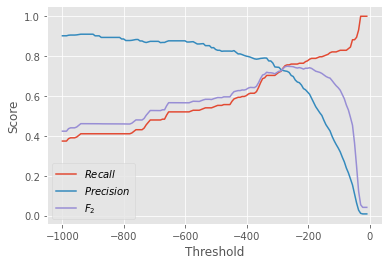

In [6]:
plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

마지막으로 테스트 리콜, 정확도, F_2점수와 함께 혼동 매트릭스를 살펴보겠습니다.

Final threshold: -269
Test Recall Score: 0.793
Test Precision Score: 0.701
Test F2 Score: 0.773


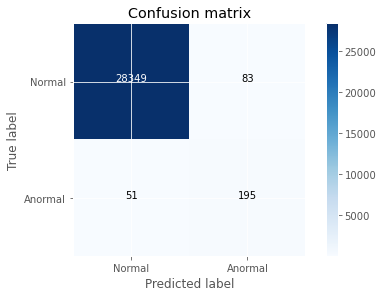

In [7]:
final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('Class', axis=1).values) < final_thresh).astype(int)

print('Final threshold: %d'%final_thresh)
print('Test Recall Score: %.3f'%recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f'%precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f'%fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anormal'], title='Confusion matrix')

F_2가 0.77이라는 나쁘지 않은 점수가 나왔습니다. 혼동 매트릭스로 부터 오직 17%의 이상값이 관측되지 않았고 이상 징후로 예측된 것 중 42%만이 거짓 양성임을 알 수 있습니다. 우리는 이 기술의 몇 가지 주요 이점을 강조할 수 있습니다.
1. 빠르게 변화하고 많은 양의 데이터로 확장됩니다.
2. 하이퍼파라미터를 조정할 필요가 없습니다.
3. 데이터가 정규분포에 가깝고 변수 간의 관계도 잘 포착할 수 있습니다.
4. 분포가 이상치에 대해 robust한 경우 완전히 라벨링된 데이터 없이 비지도학습을 진행할 수 있습니다.
5. 정규 분포로부터 나온 데이터의 확률에 직접 접근할 수 있으며 이 예측 주변에 신뢰 구간을 배치할 수 있습니다.

그러나, 이 방법을 사용하는데 몇 가지 분명한 단점이 있습니다. 가장 명확한 한가지는 데이터가 정규분포를 따를 필요가 없다는 것입니다. 한 가지 가능성은 데이터가 가우스 분포의 혼합물 또는 전혀 다른 분포에서 온다는 것입니다. 실제로 피쳐 중 일부는 가우스 모델에 의해 포착될 수 없는 분포를 가지고 있는 경우가 있습니다.

### Histogram Based
위의 모형은 다변량 분포의 모수, 즉 평균 및 공분산 행렬만 추정한다는 점에서 모수 모형입니다. 또 다른 선택지는 비모수 통계 기법을 사용하는 것입니다. 여기서는 히스토그램을 사용하여 정규 데이터를 모형화하는 것을 고려합니다. 아래에는 데이터의 여러 피쳐에 대한 5개의 히스토그램이 표시됩니다.

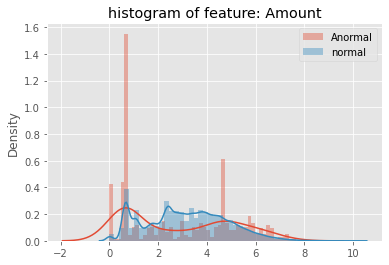

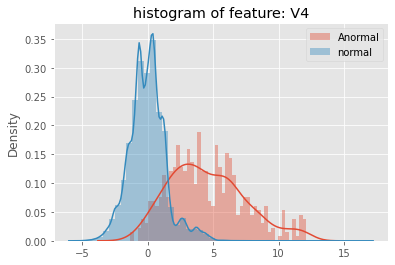

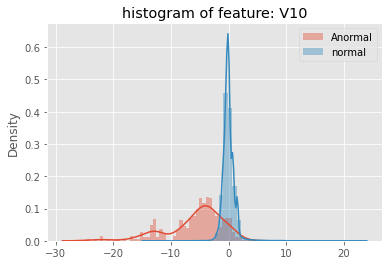

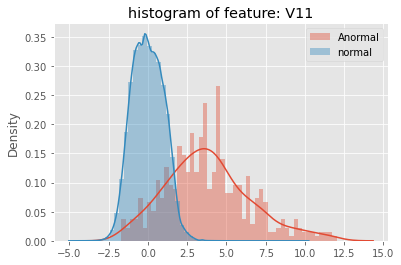

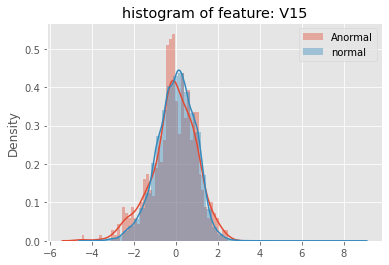

In [8]:
import matplotlib.gridspec as gridspec

for feature in ['Amount', 'V4', 'V10', 'V11', 'V15']:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.Class==1], bins=50, label='Anormal')
    sns.distplot(dataset[feature][dataset.Class==0], bins=50, label='normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()    

데이터 분포를 근사화하는 방법으로 히스토그램을 고려한다면 정상과 이상치가 일부 지역에서 겹치더라도 서로 다른 분포로 어떻게 표현할 수 있는지 알 수 있습니다. 

또한 Amount에 대한 히스토그램에서 로그 변환을 사용한 후에도 그다지 정규분포처럼 보이지 않는다는 것을 알 수 있습니다. 정상과 이상치의 분포는 중복 영역이 크기 때문에 부정 거래를 식별하는 데만 사용할 수 있기를 바랄 수 없습니다.

피쳐 V10의 히스토그램은 뚜렷한 분포를 보여줍니다. 이상치의 경우 가우스 혼합에 가까운 분포를 따르는 반면 정상 데이터는 명확한 정규 분포를 따르는 것을 볼 수있습니다. 

마지막으로 정상 분포와 이상치 분포간에 겹치는 부분이 있지만, 분리된 영역을 볼 수 있습니다. 히스토그램 기반 기술은 다음과 같은 패턴을 탐색합니다.

먼저 정상 훈련 데이터에서 피쳐당 하나의 히스토그램을 모형화합니다. 그러면 평가 시 각 히스토그램에서 데이터 인스턴스가 어느 빈에 속하는지 확인할 수 있습니다. 그 다음 빈의 높이를 결합하여 데이터 인스턴스에 대한 최종 점수를 생성합니다. 점수가 너무 낮으면 데이터가 정상 데이터가 거의 없거나 아예 없는 빈에 속한다는 의미입니다. 이상 징후로 표시할 수도 있습니다.

In [9]:
class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        
        bin_hight, bin_edge = [], []
        
        for var in X.T:
            # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
            
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)
        
    def predict(self, X):
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # find which bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin() - 1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hight
            scores.append(np.mean(obs_score))
            
        return np.array(scores)
    
model = hist_model()
model.fit(train.drop('Class', axis=1).values)
print(np.median(model.predict(valid[valid['Class']==0].drop('Class', axis=1).values)))
print(np.median(model.predict(valid[valid['Class']==1].drop('Class', axis=1).values)))

67667.86666666667
30645.86666666667


다시 한 번 검증 셋을 이용하여 점수에 대한 임계값을 결정하며, 그 아래에서 인스턴스를 이상 징후로 간주합니다. 게다가 우리는 이제 그 숫자를 조율해야하는 하이퍼파라미터로서 빈의 수를 가지고 있습니다.

In [10]:
thresholds = np.linspace(10000, 80000, 100)
scores = []
y_pred_score = model.predict(valid.drop('Class', axis=1).values)
for threshold in thresholds:
    y_hat = (y_pred_score < threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                   precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                   fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])
    
scores = np.array(scores)

임계값에 따른 리콜, 정확도, F2스코어 그래프를 그립니다.

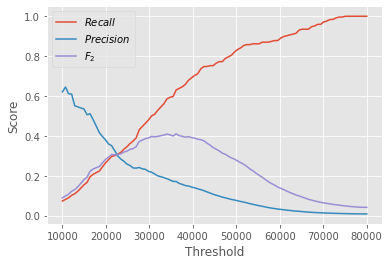

In [11]:
plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

마지막으로 가장 좋은 검증 F score와 임계값을 선택하여 테스트 셋을 평가합니다.

Final Threshold: 36161
Test Recall Score: 0.646
Test precision Score: 0.170
Test F2 Score: 0.415


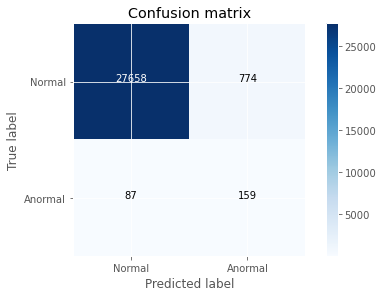

In [12]:
final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (model.predict(test.drop('Class', axis=1).values) < final_thresh).astype(int)

print('Final Threshold: %d' % final_thresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anormal'], title='Confusion matrix')

히스토그램 기반 기술이 가우스 기반 기술보다 훨씬 더 나쁘다는 것을 알 수 있습니다. 히스토그램 기반 기술은 가우스 분포만 나타내는 한계를 극복했지만 다른 한편으로는 변수 간의 관계를 포착하지 않습니다. 이러한 단점이 성능 저하에 원인이 있다고 생각합니다. 

부정 거래를 탐지하는경우, 부정 거래가 자주 일어나는 속성들을 쉽게 생각할 수 있지만 이들 값의 조합은 그렇지 않을 수 있습니다. 예를 들어 오전 6시 이전의 거래와 $1000 이상의 거래를 고려해보겠습니다. 각 행동은 빈번하지만 동시에 일어날 가능성은 거의 없습니다.

## Cluster based technique
클러스터 기술은 유사한 데이터를 그룹화하는 데 사용되는 비지도 기계학습 방법입니다. 여기서는 정상 데이터 인스턴스는 가장 가까운 클러스터 중심 가까이에 있지만 이상 징후는 가장 가까운 클러스터 중심에서 멀리 떨어져 있다고 가정하는 방법입니다.

EM 알고리즘을 사용하여 데이터를 가우시안(n)으로 클러스터링합니다. 그 후 테스트에서 데이터 P(X)의 확률을 각 인스턴스가 군집에 속할 확률로 계산합니다.

이 가우스 모델의 혼합은 데이터가 가우스 분포의 혼합에서 나온다고 가정합니다. 이론적으로는 중심점이 충분하다면 이 분포는 모든 분포를 나타내기에 충분하지만 너무 많은 군집을 적합시키면 과적합을 유발할 수 있습니다. 

따라서 많은 가우스 분포를 사용하지 않으면서 완벽하게 포착하지 않는 것이 좋습니다. 그러나 가우스(이상 데이터의 경우 V10피쳐에서 본 것과 같은)혼합에 의한 피쳐 분포가 근사적으로 될 수 있다면 데이터 생성 프로세스를 매우 잘 포착할 수 있습니다.

또한 가우시안에 대한 전체 공분산 행렬을 사용하면 피쳐간의 상관관계도설명하고 히스토그램 기반 기술에서 발견한 한계를 극복합니다.

우리가 사용한 단순 다변량 가우스 방법과 비교하여 한가지 단점은 가우스 혼합에서 적합할 가우스의 수는 하이퍼파라미터라는 점입니다. 검증셋을 사용하여 이 작업을 수행했으며 데이터 셋에서 가우스 값 3이 최적임을 발견했습니다. 

이 기법의 또 다른 단점은 중심점의 시작 위치에 민감하다는 점이며 높은 비용의 극소값을 피하기 위해 랜덤 재시작이 필요할 수 있다는 점입니다. 여기서는 무작위 재시작 4개를 사용합니다.

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(train.drop('Class', axis=1).values)
print(gmm.score(valid[valid['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(valid[valid['Class'] == 1].drop('Class', axis=1).values))

8.671670996339442
-67051.7379033421


검증 셋을 사용하여 임계값을 조정해가며 정상/이상 데이터를 분류합니다.

In [14]:
thresholds = np.linspace(-400, 0, 100)
y_scores = gmm.score_samples(valid.drop('Class', axis=1).values)
scores = []
for threshold in thresholds:
    y_hat = (y_scores < threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                  precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                  fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])
    
scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.8004827031375704 74


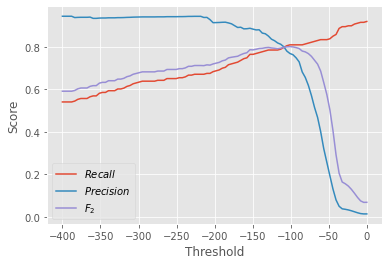

In [15]:
plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

마지막으로, 훈련 및 조정된 모델을 가지고 테스트 셋에 대한 최종 평가를 진행합니다.

Final threshold: -101.010101
Test Recall Score: 0.809
Test Precision Score: 0.726
Test F2 Score: 0.791


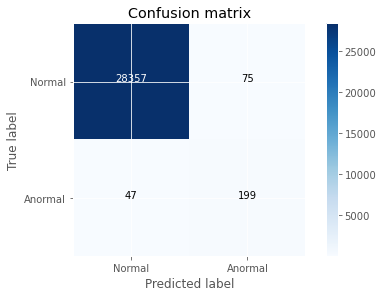

In [16]:
final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (gmm.score_samples(test.drop('Class', axis=1).values) < final_thresh).astype(int)

print('Final threshold: %f'%final_thresh)
print('Test Recall Score: %.3f'%recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f'%precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f'%fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anormal'], title='Confusion matrix')

이 기술은 매우 효과적일뿐만 아니라 매우 간단합니다. 일부 단점은 이 기술이 클러스터링의 부산물로 이상 징후를 감지하고 이상 징후 감지에 최적화되지 않았으며 이들의 계산 복잡성이 대규모 데이터 세트의 병목 현상인 경우가 많다는 것입니다.

지금까지 고려했던 기술은 데이터가 특정 분포에서 추출되었거나 데이터의 서로 다른 기능 간의 관계를 캡처할 수 없다고 가정했습니다. 이제 우리는 모든 확률 분포를 보편적으로 근사화할 수 있는 가능성을 가진 방법에 관심을 기울일 것입니다. 이것은 그들이 더 낫다는 것을 의미하지 않습니다. 앞으로 알게 되겠지만, 이 추가 용량은 더 단순한 방법보다 더 나쁜 결과를 낳습니다. 아마도 그것들에 의해 생성된 경계가 너무 복잡하여 과적합을 야기하기 때문일 것입니다.

### Support Vector Machines based techniques
다변량 가우스 방법과 마찬가지로 이 기법에서는 정상 거래 교육 데이터가 들어 있는 영역을 찾습니다. 하지만 이제 우리는 더 이상 학습과 타원형 경계에 국한되지 않습니다. 서포트 벡터 머신 기술은 단일 클래스 SVM을 데이터에 적합시키고 커널을 사용하여 임의적으로 형성된 경계를 학습합니다. 이 SVM이 작동하는 방식은 먼저 데이터를 더 큰(아마 무한대일 수 있는) 공간에 투영하는 것입니다. 이 공간에서는 원래 공간에 있는 모든 데이터를 캡처할 수 없는 하이퍼스피어가 있더라도 일반 데이터를 하이퍼스피어로 캡슐화할 수 있습니다. 평가 시 경계로부터의 거리를 점수로 사용합니다. 여기서 음수는 데이터가 이 경계 밖에 있음을 의미합니다. 이 투영 작업은 비용이 너무 많이 들기 때문에 커널 트릭을 사용하여 투영 공간에서 거리 메트릭을 전혀 방문하지 않고도 정의할 수 있습니다.

그러나 SVM은 너무 오래걸립니다 ㅠ 

from sklearn.svm import OneClassSVM

model = OneClassSVM(gamma=0.000562, nu=.95, kernel='rbf')
model.fit(train.drop('Class', axis=1).values)
print(model.decision_function(valid[valid['Class']==0].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class']==1].drop('Class', axis=1).values).mean())

검증 세트를 사용하여 단일 클래스 SVM의 하이퍼 파라미터와 임계값을 모두 조정해야 합니다. SVM의 경우 방사형 기본 커널을 사용하고 그리드 검색을 통해 하이퍼 파라미터를 조정했습니다.

thresholds = np.linspace(-50000, -400, 500)
y_scores = model.decision_function(valid.drop('Class', axis=1).values)
scores = []
for threshold in thresholds:
    y_hat = (y_scores < threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                   precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                   fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])
    
scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

마지막으로 테스트 셋의 결과를 살펴봅니다.

final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (model.decision_function(test.drop('Class', axis=1).values) < final_thresh).astype(int)

print('Final threshold: %f'%final_thresh)
print('Test Recall Score: %.3f'%recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f'%precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f'%fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

이 결과는 단일 클래스 SVM이 EM 및 다변량 가우스 기술보다 나쁘지만 히스토그램 기반 기술보다 낫다는 것을 보여줍니다. 이 기술의 주요 단점 중 하나는 알고리즘의 복잡성(O(N^3)으로 SVM을 훈련시키는 속도가 매우 느리다는 것입니다. 이는 비선형 커널이 있는 SVM을 대규모 데이터셋에서 사용하는 것을 거의 금지시키는 한 가지 주요 단점입니다. 또 다른 단점은 투영 공간을 고려하여 SVM을 해석해야 하기 때문에 해석하기가 매우 직관을 필요로 하는 경우가 많다는 것입니다.

몇 가지 장점으로는 SVM이 모든 확률 분포를 나타낼 수 있고 기본 데이터 분포를 더 잘 캡처할 수 있는 서로 다른 커널에 최적화될 수 있다는 사실이 있습니다.

### Tree based techniques
트리 기반 기술은 데이터를 피쳐별로 분할합니다. 여기서는 "피쳐를 임의로 선택한 다음 선택한 피쳐의 최대값과 최소값 사이의 분할 값을 임의로 선택하여 관측치를 분리"하는 분리 포레스트를 사용합니다. "데이터로 인한 랜덤 트리에서 인스턴스 분할은 모든 인스턴스가 분리될 때까지 반복적으로 반복됩니다. (a) 트리 구조의 경로가 짧아지고 (b) 속성 값을 식별할 수 있는 인스턴스가 초기 분할에서 분리될 가능성이 더 높기 때문에 이러한 랜덤 분할은 이상 징후를 나타내는 경로가 눈에 띄게 짧아집니다." 그런 다음 포레스트의 평균 경로 길이를 점수로 사용하고 짧은 평균 경로를 비정상적인 트랜잭션으로 플래그 인스턴스를 사용할 수 있습니다.

또한 이 방법은 확률 분포를 근사화할 수 있습니다. 또한 피쳐 공간을 재귀적으로 분할하면 데이터 크기의 로그로 스케일링하고 각 분리 트리를 병렬로 계산할 수 있으므로 이 접근 방식이 매우 빠릅니다. 아래는 50개의 분리 트리를 사용하여 분리포레스트를 만듭니다.

In [17]:
from sklearn.ensemble import IsolationForest
np.random.seed(42)

model = IsolationForest(random_state=42, n_jobs=4, max_samples=train.shape[0],
                        bootstrap=True, n_estimators=50)
model.fit(train.drop('Class', axis=1).values)
print(model.decision_function(valid[valid['Class']==0].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class']==1].drop('Class', axis=1).values).mean())

0.1501582844248356
-0.05348996832288196


검증 셋을 사용하여 임계값 튜닝을 통해 점수를 얻습니다.

In [18]:
thresholds = np.linspace(-.2, .2, 200)
y_scores = model.decision_function(valid.drop('Class', axis=1).values)
scores = []
for threshold in thresholds:
    y_hat = (y_scores < threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                   precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                   fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)
                   ])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.6756756756756757 118


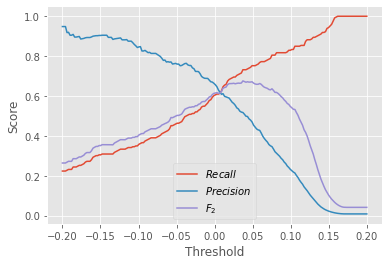

In [19]:
plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

최적의 임계값을 사용하여 테스트 스코어를 측정합니다.

Final threshold: 0.037186
Test Recall Score: 0.736
Test Precision Score: 0.523
Test F2 Score: 0.680


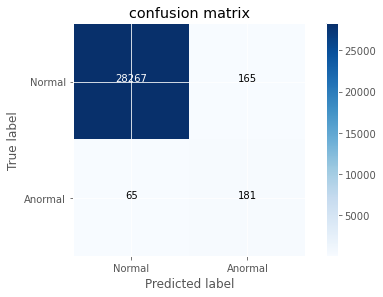

In [20]:
final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (model.decision_function(test.drop('Class', axis=1).values) < final_thresh).astype(int)

print('Final threshold: %f'%final_thresh)
print('Test Recall Score: %.3f'%recall_score(y_pred=y_hat_test,
                                             y_true=test['Class'].values))
print('Test Precision Score: %.3f'%precision_score(y_pred=y_hat_test,
                                             y_true=test['Class'].values))
print('Test F2 Score: %.3f'%fbeta_score(y_pred=y_hat_test,
                                             y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anormal'], 
                      title = 'confusion matrix')

EM 이나 다변량 가우시안보다는 점수가 좋지 않습니다.

### Neural based techniques
최근 몇 년 동안, 비지도학습의 딥러닝은 기계학습 연구에서 영역을 넓혀왔습니다.
여기서는 자동 인코더라는 이름의 복제 신경망에 대해 잘 알려진 접근 방식을 사용할 것입니다. 이 기술에서는 입력 뉴런 수와 출력 뉴런 수가 동일한 다층 퍼셉트론이 입력 데이터를 복제할 수 있는 최대 가능성을 가지고 훈련됩니다. 단순히 단위 함수를 학습하는 것을 피하기 위해, 우리는 입력 크기보다 적은 뉴런을 가진 병목 계층을 사용하여 네트워크가 내부 표현으로 입력을 압축하도록 강요합니다.

네트워크를 훈련시키기 위해 정상 데이터만 사용하는 경우, 네트워크의 좋은 내부 표현을 배우고 정상 데이터를 복사할 수 있습니다. 게다가, 이상 데이터가 어떻게 보이는 지 본 적이 없기 때문에 네트워크가 이상 징후를 재구성하는 일을 제대로 하지 않기를 원합니다. 따라서 재구성 오류 $\tilde{x}-x^2$를 이상 점수로 사용할 수 있습니다. 오류가 너무 크면 인스턴스에 이상 징후로 플래그를 지정할 수 있습니다.

아래에 오직 2개의 뉴런의 병목 레이어를 가진 자동 인코더를 만듭니다.


In [23]:
import tensorflow as tf
#tf.reset_default_graph()
#tf.set_random_seed(2)

batch_size = 10000

n_visible = train.drop('Class', axis=1).values.shape[1]
n_hidden1 = 27
n_hidden2 = 16
n_hidden3 = 2

learning_rate = 0.01

# create node for input data
X_tf = tf.placeholder('float', [None, n_visible], name='X')

# Parameters initialization
W1_init = 4 * np.sqrt(6. / (n_visible + n_hidden1))
W2_init = 4 * np.sqrt(6. / (n_hidden1 + n_hidden2))
W3_init = 4 * np.sqrt(6. / (n_hidden2 + n_hidden3))

W1 = tf.Variable(tf.random_uniform([n_visible, n_hidden1],
                                   minval=-W1_init, maxval=W1_init), name='W1')
b1 = tf.Variable(tf.zeros([n_hidden1]), name='b1')

W2 = tf.Variable(tf.random_uniform([n_hidden1, n_hidden2],
                                   minval=-W2_init, maxval=W2_init), name='W2')
b2 = tf.Variable(tf.zeros([n_hidden2]), name='b2')

W3 = tf.Variable(tf.random_uniform([n_hidden2, n_hidden3],
                                   minval=-W3_init, maxval=W3_init), name='W3')
b3 = tf.Variable(tf.zeros([n_hidden3]), name='b3')

W3_prime = tf.Variable(tf.random_uniform([n_hidden3, n_hidden2],
                                         minval=-W3_init, maxval=W3_init), name='W3_prime')
b3_prime = tf.Variable(tf.zeros([n_hidden2]), name='b3_prime')

W2_prime = tf.Variable(tf.random_uniform([n_hidden2, n_hidden1],
                                         minval=-W2_init, maxval=W2_init), name='W2_prime')
b2_prime = tf.Variable(tf.zeros([n_hidden1]), name='b2_prime')

W1_prime = tf.Variable(tf.random_uniform([n_hidden1, n_visible],
                                         minval=-W1_init, maxval=W1_init), name='W1_prime')
b1_prime = tf.Variable(tf.zeros([n_visible]), name='b1_prime')

def autoencoder(X_tf):
    
    # encoder
    Y = tf.nn.tanh(tf.matmul(X_tf, W1) + b1)
    Y = tf.nn.tanh(tf.matmul(Y, W2) + b2)
    Y = tf.nn.tanh(tf.matmul(Y, W3) + b3)
    
    # decoder
    Z = tf.nn.tanh(tf.matmul(Y, W3_prime) + b3_prime)
    Z = tf.nn.tanh(tf.matmul(Z, W2_prime) + b2_prime)
    Z = tf.nn.tanh(tf.matmul(Z, W1_prime) + b1_prime)
    
    return Z, Y

Z, Y = autoencoder(X_tf)

cost = tf.reduce_mean(tf.pow(X_tf - Z, 2))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
scores = tf.abs(X_tf - Z)

X_train = train.drop('Class', axis=1).values
X_val_norm = valid[valid['Class'] == 0].drop('Class', axis=1).values
X_val_anorm = valid[valid['Class'] == 1].drop('Class', axis=1).values

AttributeError: module 'tensorflow' has no attribute 'placeholder'

ML을 사용하여 정상 데이터를 재구성합니다.

In [ ]:
with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    for step in range(15001):
        
        offset = (step * batch_size) % (X_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :]
        sess.run(train_op, feed_dict={X_tf: batch_data,})
        
        if (step % 3000 == 0):
            print('\nBatch loss at step %d: %f' % (step, sess.run(cost, feed_dict={X_tf: batch_data})))
            print('Val Norm loss at step %d: %f' % (step, sess.run(cost, feed_dict={X_tf: X_val_norm})))
            print('Val ANorm loss at step %d: %f' % (step, sess.run(cost, feed_dict={X_tf: X_val_norm})))
            
    y_scores_valid, enc_val = sess.run([scores, Y], feed_dict={X_tf: valid.drop('Class', axis=1).values})
    y_scores_test, enc_text = sess.run([scores, Y], feed_dict={X_tf: test.drop('Class', axis=1).values})

그런 다음 검증 셋을 사용하여 임계값을 튜닝합니다.

In [ ]:
thresholds = np.linspace(0, 6, 100)

scores = []
for threshold in thresholds:
    y_hat = (y_scores_valid.mean(axis=1) > threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                   precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                   fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])
    
scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

In [ ]:
plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

자동 인코더의 또 다른 흥미로운 점은 데이터의 내부 표현을 보는 것입니다. 재구성 오류를 최소화하도록 훈련되었기 때문에 PCA와 유사하지만 비선형적이라고 생각할 수 있습니다. 또한, 우리는 단지 두 개의 뉴런을 병목 레이어로 사용했기 때문에 우리는 그들의 활동을 그림을 통해 볼 수 있습니다.

In [ ]:
plt.scatter(enc_val[:, 0], enc_val[:, 1], c=valid['Class'].values, alpha=.5)
plt.show()

신경망에서 학습한 이 새로운 피처 공간에서 많은 양의 이상 징후를 쉽게 분리할 수 있다는 것은 좋은 소식입니다. 

마지막으로 테스트 셋을 사용하여 자동 인코도의 최종 결과를 살펴봅니다.

In [ ]:
final_thresh = thresholds[scores[:, 2].argmax()]
y_hat_test = (y_scores_test.mean(axis=1) > final_thresh).astype(int)
print('Final threshold: %f'%final_thresh)
print('Test Recall Score: %.3f'%recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f'%precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f'%fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anormal'], title='Confusion matrix')

자동 인코더가 이상 징후를 잘 탐지하지 못하는 것처럼 보입니다